-------------------Part 1-------------------------

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np

In [ ]:
#read dataset
df = pd.read_csv("/content/drive/My Drive/singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv")

In [ ]:
#sample dataset
df.tail()

,year,level_1,level_2,value
20455,2018,Other Ethnic Groups (Females),65 Years & Over,3386
20456,2018,Other Ethnic Groups (Females),70 Years & Over,2087
20457,2018,Other Ethnic Groups (Females),75 Years & Over,1362
20458,2018,Other Ethnic Groups (Females),80 Years & Over,842
20459,2018,Other Ethnic Groups (Females),85 Years & Over,437


In [ ]:
#removing null values from the dataset
df = df[df.value != 'na']
df['value']=df['value'].astype(int)

In [ ]:
#maximum value of dataset
df.max()

year                  2018
level_1    Total Residents
level_2    85 Years & Over
value               547854
dtype: object

In [ ]:
#years in complete dataset
A =[1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 
1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 
1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]



In [ ]:
# extracting groups and creating different table in respective of years
# average population growth
table = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )

eth=['Total Residents', 'Total Male Residents',
       'Total Female Residents',  'Total Male Malays',
       'Total Female Malays',  'Total Male Chinese',
       'Total Female Chinese',  'Total Male Indians',
       'Total Female Indians', 
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)']
for i in eth:
    table.drop(i,axis=0,inplace=True)

table

sum           ...                  
                               value           ...                  
year                            1957     1958  ...     2017     2018
level_1                                        ...                  
Other Ethnic Groups (Total)    35976    30000  ...   142749   144270
Total Chinese                1137408  1178100  ...  3897313  3975586
Total Indians                 125912   132400  ...   423433   428314
Total Malays                  202907   212000  ...   626221   636807

[4 rows x 62 columns]

In [ ]:
# proportion of the total population do they constitute
tr = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Male Residents',
       'Total Female Residents',  'Total Male Malays',
       'Total Female Malays',  'Total Male Chinese',
       'Total Female Chinese',  'Total Male Indians',
       'Total Female Indians', 
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)','Other Ethnic Groups (Total)','Total Chinese','Total Indians','Total Malays']
for i in eth:
    tr.drop(i,axis=0,inplace=True)

In [ ]:

#Calculating Average Growth rate of the various ethnic Groups
avg=[]
y=2018-1957
i=0
while i < len(table.index):
    initial=table.iloc[i,0]
    final=table.iloc[i,-1]
    temp=(((final/initial)**(1/y))-1)*100
    avg.append(temp)
    i=i+1
avg

[2.30289427455721, 2.072696552850406, 2.0272812169889187, 1.8926365248142396]

In [ ]:
# Percentages over different groups

table_1 = np.matrix(table.values)

column_labels = A
idx_labels = ['Other Ethnic Groups (Total)', 'Total Chinese', 'Total Indians', 'Total Malays']

df1 = pd.DataFrame(table_1)
df1.columns = column_labels
df1.index = idx_labels
df1.index.name = 'Proportion'

# Create percentage table
df_percentage = np.round(df1*100/tr.iloc[-1, -1], 1)

df_percentage.insert(62,'Average Growth Rate',avg,True)
df_percentage

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Average Growth Rate
Proportion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Total),0.7,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.5,0.8,0.8,0.8,0.9,0.9,0.9,0.9,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.8,0.8,0.8,0.9,0.9,1.0,1.0,1.0,1.1,1.2,1.2,1.3,1.5,1.7,1.9,2.2,2.5,2.6,2.6,2.6,2.7,2.7,2.7,2.7,2.8,2.8,2.302894
Total Chinese,21.9,22.7,23.8,24.8,25.6,26.4,27.1,27.9,28.6,29.3,29.9,30.5,31.0,32.0,32.3,33.0,33.7,34.4,35.0,35.5,36.1,36.6,37.2,38.2,38.2,38.9,39.6,40.3,41.0,41.6,42.2,43.0,43.9,46.8,47.9,48.9,49.8,50.8,51.7,52.7,53.6,54.6,55.5,56.3,57.4,58.5,58.2,59.3,60.4,61.5,62.5,63.6,65.2,66.3,67.2,68.4,69.6,70.9,72.3,73.6,75.2,76.7,2.072697
Total Indians,2.4,2.6,2.6,2.6,2.6,2.7,2.7,2.7,2.8,2.8,2.8,2.8,2.9,2.8,2.9,2.9,2.9,2.9,3.0,3.0,3.0,3.0,3.0,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.9,4.1,4.2,4.4,4.5,4.6,4.8,5.0,5.2,5.4,5.6,5.7,5.8,6.1,5.9,6.1,6.4,6.6,6.9,7.1,7.5,7.6,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,2.027281
Total Malays,3.9,4.1,4.3,4.5,4.7,4.9,5.0,5.2,5.4,5.6,5.8,5.9,6.0,5.9,6.2,6.3,6.4,6.5,6.6,6.7,6.7,6.8,6.9,6.7,6.7,6.8,6.9,7.0,7.2,7.3,7.4,7.6,7.7,8.0,8.2,8.4,8.6,8.8,8.9,9.1,9.3,9.4,9.6,9.7,9.9,10.1,10.1,10.3,10.4,10.6,10.7,10.8,11.0,11.1,11.2,11.3,11.4,11.6,11.7,11.9,12.1,12.3,1.892637


In [ ]:
df1 = df.groupby(df["year"])

In [ ]:
# average by year
df1.mean()

,value
year,
1957,18208.521212
1958,25875.000000
1959,27048.333333
1960,28065.000000
1961,29020.000000
...,...
2014,58468.181818
2015,59488.509091
2016,60536.145455


In [ ]:
# extracting age groups and creating different table in respective of years
# average population growth

age = pd.pivot_table(df, 
                         index=["level_2"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0,
                         margins=False,
                         margins_name='Total'
                        )
#Calculating column wise sum 
Total=age.sum(axis=0)
Total.T
#t=pd.DataFrame(Total)
#age.append(Total.T).reset_index()
age

sum                    ...                           
                   value                    ...                           
year                1957     1958     1959  ...     2016     2017     2018
level_2                                     ...                           
0  -  4 Years    1058908  1111200  1155200  ...   748640   750612   742112
10 - 14 Years     545120   628400   702800  ...   829980   825012   826120
15 - 19 Years     542716   537200   526000  ...   959084   931892   906080
20 - 24 Years     477064   499600   532400  ...  1043416  1036288  1022064
25 - 29 Years     446904   458800   460400  ...  1119952  1160792  1166524
30 - 34 Years     359700   380400   408400  ...  1142176  1117360  1125588
35 - 39 Years     330836   337200   340800  ...  1207992  1203824  1214880
40 - 44 Years     304868   310000   316400  ...  1253780  1245936  1214560
45 - 49 Years     266864   277200   289600  ...  1204732  1213828  1231352
5  -  9 Years     872388   918400   964000  ...   806036   802300   796264
50 - 54 Years     207176   216800   229200  ...  1262392  1251256  1235860
55 - 59 Years     149824   161600   171600  ...  1198364  1206712  1217560
60 - 64 Years      97104   103600   109200  ...  1007412  1050604  1086752
65 - 69 Years      61596    68400    71200  ...   792080   815876   848404
65 Years & Over   124244   134800   142800  ...  1950280  2066768  2191416
70 - 74 Years      35096        0        0  ...   415184   477976   542184
70 Years & Over    62648    66400    71600  ...  1158200  1250892  1343012
75 - 79 Years      16900        0        0  ...   351820   367812   373308
75 Years & Over    27552        0        0  ...   743016   772916   800828
80 - 84 Years       7144        0        0  ...   214224   217364   228412
80 Years & Over    10652        0        0  ...   391196   405104   427520
85 Years & Over     3508        0        0  ...   176972   187740   199108

[22 rows x 62 columns]

In [ ]:
avg=[]
y=2018-1957
i=0
while i < len(age.index):
    initial=age.iloc[i,0]
    final=age.iloc[i,-1]
    temp=(((final/initial)**(1/y))-1)*100
    avg.append(temp)
    i=i+1
avg

[-0.5810810442230419,
 0.6838590005160183,
 0.84377172339829,
 1.2568968826288218,
 1.5852866549884714,
 1.8877451494358821,
 2.1553212314678216,
 2.2918658786706514,
 2.5384522694656075,
 -0.1495658909066111,
 2.9710741530563523,
 3.494326036844675,
 4.038713341846956,
 4.393378763171718,
 4.817451641294346,
 4.589957097355235,
 5.153202277305269,
 5.204846591133738,
 5.679302057619351,
 5.844545681481206,
 6.239813503358116,
 6.845091623718758]

In [ ]:
# proportion of the total population do they constitute

age_table = np.matrix(age.values)

column_labels = A

idx_labels=['0  -  4 Years', '10 - 14 Years', '15 - 19 Years', '20 - 24 Years',
       '25 - 29 Years', '30 - 34 Years', '35 - 39 Years', '40 - 44 Years',
       '45 - 49 Years', '5  -  9 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '65 Years & Over', '70 - 74 Years',
       '70 Years & Over', '75 - 79 Years', '75 Years & Over', '80 - 84 Years',
       '80 Years & Over', '85 Years & Over']

T=np.matrix(Total)
T.shape
Tot=pd.DataFrame(T)
Tot.rename(index={0: 'Total'},inplace=True)

dfage = pd.DataFrame(age_table)
dfage.columns = column_labels
dfage.index = idx_labels
dfage.index.name = 'Proportion'


#Create percentage table
age_percentage = np.round(dfage*100/Tot.iloc[-1, -1], 1)
age_percentage.insert(62,'Average Growth Rate',avg,True)
age_percentage

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Average Growth Rate
Proportion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0 - 4 Years,5.1,5.4,5.6,5.7,5.9,5.9,5.8,5.8,5.7,5.6,5.5,5.3,5.0,4.4,4.4,4.4,4.4,4.4,4.4,4.3,4.1,3.9,3.8,3.6,3.6,3.7,3.8,3.8,3.9,3.9,3.9,4.0,4.2,4.3,4.5,4.7,4.8,4.8,4.8,4.7,4.7,4.6,4.5,4.4,4.3,4.2,4.0,4.0,3.8,3.8,3.7,3.7,3.8,3.7,3.6,3.6,3.5,3.5,3.5,3.6,3.6,3.6,-0.581081
10 - 14 Years,2.6,3.0,3.4,3.9,4.2,4.3,4.5,4.6,4.8,5.0,5.1,5.3,5.4,5.5,5.6,5.6,5.6,5.6,5.5,5.4,5.2,5.0,4.8,4.4,4.3,4.2,4.2,4.3,4.2,4.1,4.0,3.9,3.8,3.8,3.9,3.9,4.0,4.0,4.0,4.0,4.0,4.1,4.4,4.5,4.8,5.0,5.0,5.0,5.0,4.9,4.9,4.9,4.8,4.7,4.6,4.5,4.4,4.3,4.1,4.0,4.0,4.0,0.683859
15 - 19 Years,2.6,2.6,2.5,2.4,2.4,2.7,3.1,3.4,3.8,4.2,4.3,4.4,4.6,4.6,4.9,5.2,5.4,5.5,5.6,5.7,5.7,5.7,5.7,5.2,5.1,5.0,4.8,4.6,4.4,4.3,4.2,4.2,4.3,4.3,4.2,4.1,3.9,3.9,3.9,3.9,3.9,4.0,4.0,4.1,4.1,4.0,4.1,4.4,4.5,4.8,5.0,5.1,5.1,5.1,5.0,5.0,4.9,4.8,4.7,4.6,4.5,4.4,0.843772
20 - 24 Years,2.3,2.4,2.6,2.7,2.7,2.7,2.6,2.5,2.4,2.4,2.7,3.0,3.4,3.7,4.2,4.4,4.5,4.7,4.8,5.0,5.2,5.4,5.6,5.2,5.4,5.4,5.4,5.3,5.2,5.1,5.0,4.8,4.6,4.6,4.5,4.5,4.6,4.6,4.6,4.5,4.4,4.2,4.1,4.1,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.3,4.7,4.8,4.9,5.1,5.1,5.1,5.1,5.0,5.0,4.9,1.256897
25 - 29 Years,2.2,2.2,2.2,2.2,2.3,2.4,2.4,2.5,2.7,2.7,2.7,2.6,2.5,2.4,2.6,2.9,3.2,3.5,4.0,4.3,4.4,4.6,4.7,4.5,4.7,5.0,5.2,5.4,5.5,5.6,5.6,5.5,5.5,5.6,5.6,5.5,5.4,5.3,5.1,5.1,5.1,5.2,5.2,5.2,5.1,5.1,4.8,4.8,4.8,4.9,4.9,5.1,5.3,5.3,5.1,4.9,4.9,5.1,5.2,5.4,5.6,5.6,1.585287
30 - 34 Years,1.7,1.8,2.0,2.1,2.2,2.2,2.2,2.2,2.2,2.3,2.3,2.4,2.5,2.5,2.7,2.8,2.8,2.7,2.6,2.6,2.9,3.3,3.6,3.7,4.1,4.2,4.3,4.5,4.7,4.9,5.2,5.4,5.5,5.8,5.9,5.9,5.9,6.0,6.0,6.0,5.9,5.9,5.7,5.6,5.5,5.6,5.5,5.6,5.7,5.7,5.7,5.6,5.7,5.8,5.7,5.7,5.7,5.6,5.6,5.5,5.4,5.4,1.887745
35 - 39 Years,1.6,1.6,1.6,1.7,1.7,1.7,1.8,1.9,2.0,2.1,2.1,2.2,2.2,2.1,2.2,2.3,2.3,2.5,2.6,2.7,2.7,2.8,2.7,2.4,2.4,2.7,3.1,3.4,3.9,4.2,4.3,4.5,4.7,4.9,5.2,5.4,5.6,5.8,5.9,6.0,6.1,6.2,6.2,6.2,6.2,6.2,6.0,5.8,5.8,5.8,5.8,5.9,6.1,6.2,6.1,6.1,5.9,5.8,5.8,5.8,5.8,5.9,2.155321
40 - 44 Years,1.5,1.5,1.5,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.7,1.8,1.9,1.9,2.0,2.1,2.1,2.1,2.1,2.2,2.2,2.3,2.4,2.4,2.5,2.6,2.6,2.6,2.4,2.4,2.8,3.1,3.5,4.0,4.3,4.5,4.6,4.8,5.0,5.3,5.5,5.7,5.9,6.0,6.1,6.2,6.1,6.2,6.2,6.2,6.2,6.1,6.0,6.0,5.9,6.0,6.0,6.1,6.1,6.0,6.0,5.9,2.291866
45 - 49 Years,1.3,1.3,1.4,1.4,1.4,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.5,1.6,1.6,1.7,1.8,1.9,1.9,2.0,2.0,2.0,2.0,2.0,2.1,2.1,2.2,2.3,2.5,2.6,2.6,2.6,2.5,2.5,2.8,3.2,3.5,4.0,4.4,4.5,4.7,4.9,5.1,5.3,5.5,5.6,5.8,5.9,6.0,6.1,6.1,6.2,6.2,6.2,6.2,6.1,6.0,5.9,5.8,5.9,5.9,2.538452


In [ ]:
#Female Gender Analysis
Female = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents', 'Total Male Residents','Total Female Residents',
        'Total Malays', 'Total Male Malays',
        'Total Chinese', 'Total Male Chinese',
        'Total Indians', 'Total Male Indians',
        'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', ]
for i in eth:
    Female.drop(i,axis=0,inplace=True)

In [ ]:
Female_tr = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents','Total Male Residents',  'Total Male Malays',
       'Total Female Malays',  'Total Male Chinese',
       'Total Female Chinese',  'Total Male Indians',
       'Total Female Indians', 
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)','Other Ethnic Groups (Total)','Total Chinese','Total Indians','Total Malays']
for i in eth:
    Female_tr.drop(i,axis=0,inplace=True)
Female_tr

sum                  ...                           
                         value                  ...                           
year                      1957    1958    1959  ...     2016     2017     2018
level_1                                         ...                           
Total Female Residents  718610  741700  777800  ...  2606695  2658986  2710323

[1 rows x 62 columns]

In [ ]:
# Male gender analysis
Male = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 
       'Total Female Malays', 'Total Chinese', 
       'Total Female Chinese', 'Total Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)', 'Other Ethnic Groups (Females)']
for i in eth:
    Male.drop(i,axis=0,inplace=True)

In [ ]:

Male_tr = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)']
for i in eth:
    Male_tr.drop(i,axis=0,inplace=True)
Male_tr

sum                  ...                           
                       value                  ...                           
year                    1957    1958    1959  ...     2016     2017     2018
level_1                                       ...                           
Total Male Residents  783593  810800  845100  ...  2387537  2430730  2474654

[1 rows x 62 columns]

In [ ]:
# Graph plots
import matplotlib.pyplot as plt


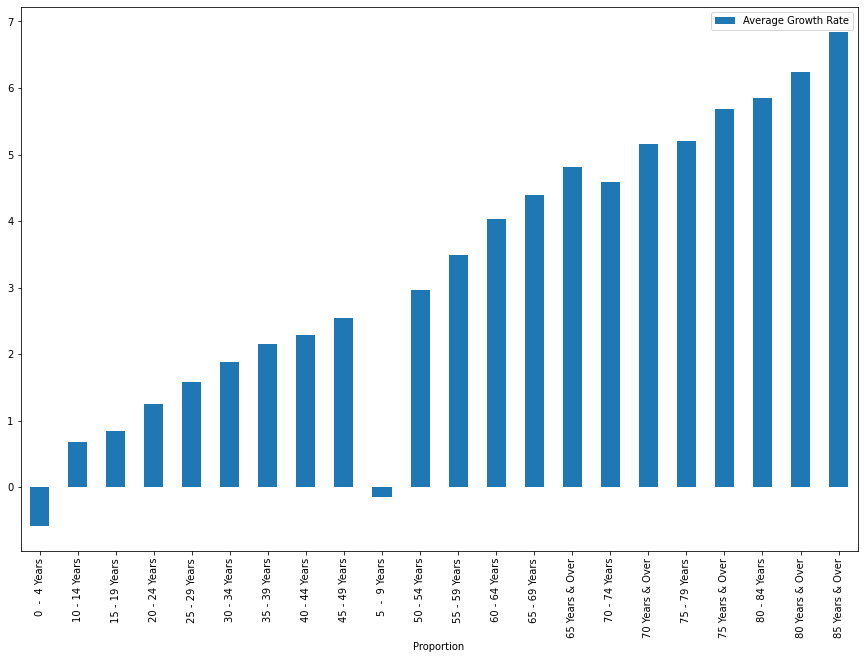

In [ ]:
age_percentage.plot.bar(y="Average Growth Rate",figsize=(15,10))

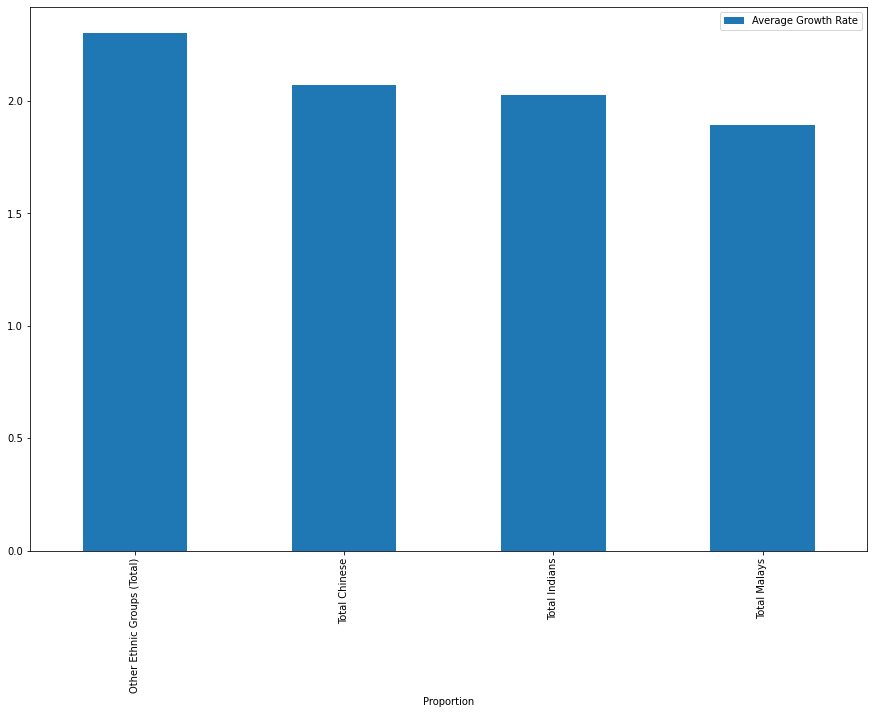

In [ ]:
df_percentage.plot.bar(y="Average Growth Rate",figsize=(15,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb87e12c6d8>],
      dtype=object)

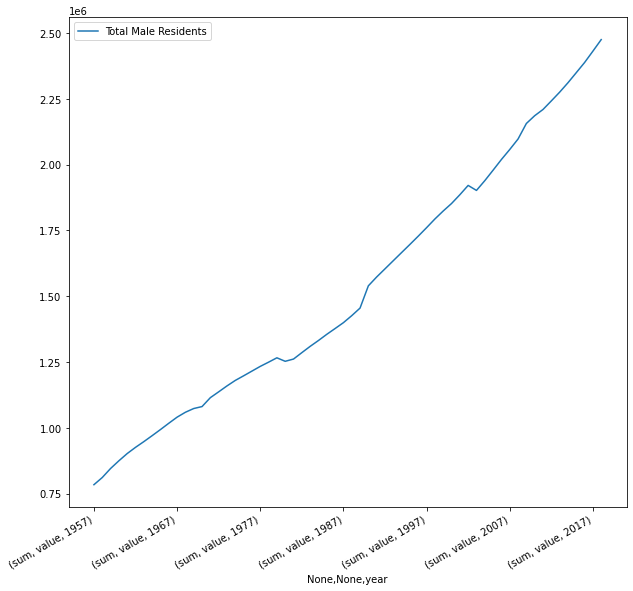

In [ ]:

Male_tr.T.plot.line(subplots=True,figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb87e126940>],
      dtype=object)

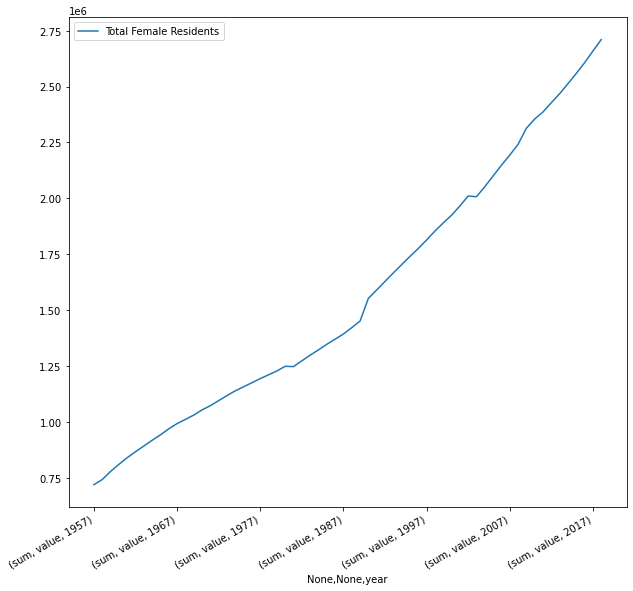

In [ ]:
Female_tr.T.plot.line(subplots=True,figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb87e042160>,
      dtype=object)

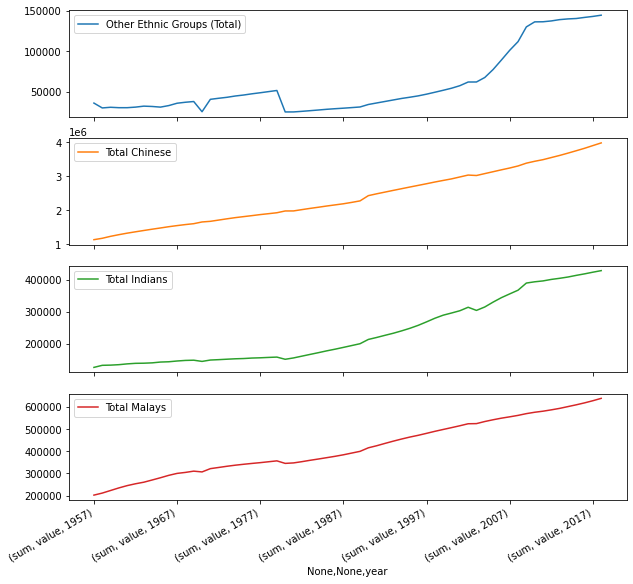

In [ ]:
table.T.plot.line(subplots=True,figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb87b831080>,
      dtype=object)

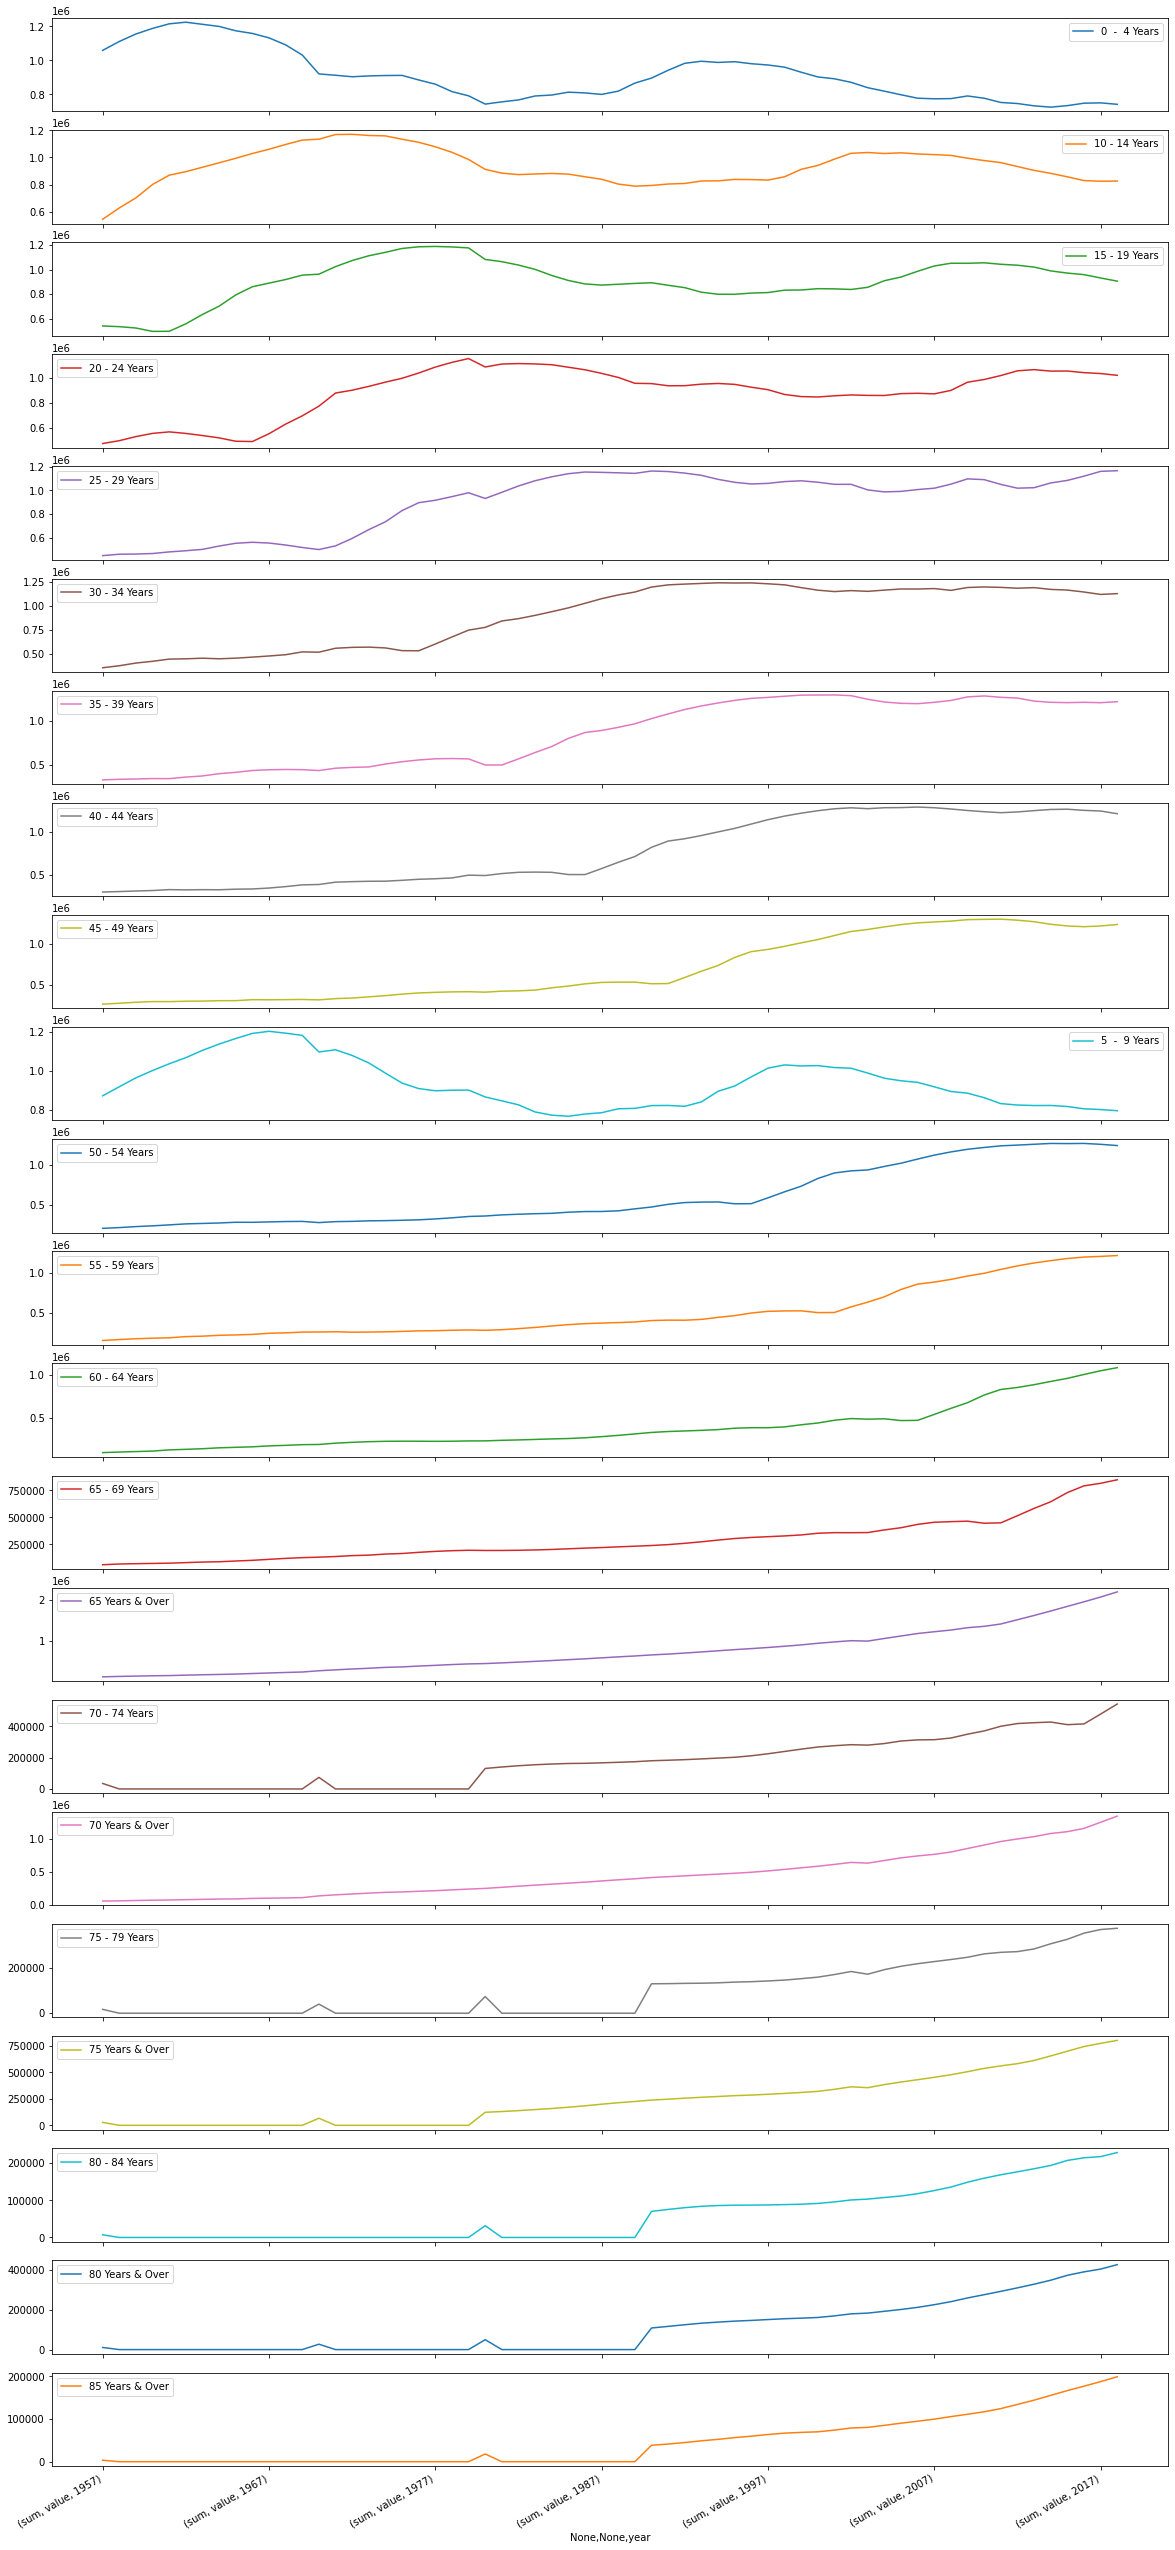

In [ ]:
age.T.plot.line(subplots=True,figsize=(20,50))